# Distributions.jl

I used Julia version "1.0.5" in building this ipynb. 
Packages required: Distributions, Random, Plots, Interact

The Distributions package provides an easy interface to sample from distributions, find moments, entropy, the pdf or MLE of parameters from a number of distributions. A look at some of the features is provided below. 

In [1]:
using Random, Distributions, Plots, Interact
Random.seed!(123);

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6048447866767198863\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12741302354146283743\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6048447866767198863\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Sampling from a distribution

First, we'll sample from a normal distribution with specified mu and sigma. 

In [2]:
d = Normal(2,1.3)
x = rand(d, 1000);

@show mean(x)
@show sqrt(var(x));

mean(x) = 2.033536749654503
sqrt(var(x)) = 1.3112476821537435


Other functions are provided, such as finding the quantiles of distributions.

In [3]:
quantile.(Normal(), [0.5, 0.975])

2-element Array{Float64,1}:
 0.0               
 1.9599639845400576

## Looking at the sampling from some distributions

### Beta

Sampling from a beta distribution.

In [4]:
@show b = Distributions.Beta(5,1)
b_samp = rand(b, 10000);

b = Distributions.Beta(5, 1) = Beta{Float64}(α=5.0, β=1.0)


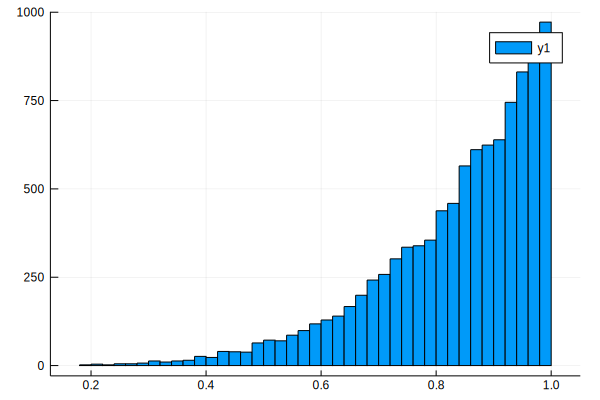

In [5]:
histogram(b_samp, bins=40)

### Truncated Distributions: Truncated Normal

Here we can sample from any distribution but limiting the output to within a range.

In [6]:
truncn = Truncated(Normal(5, 2), 0, 6)

Truncated(Normal{Float64}(μ=5.0, σ=2.0), range=(0.0, 6.0))

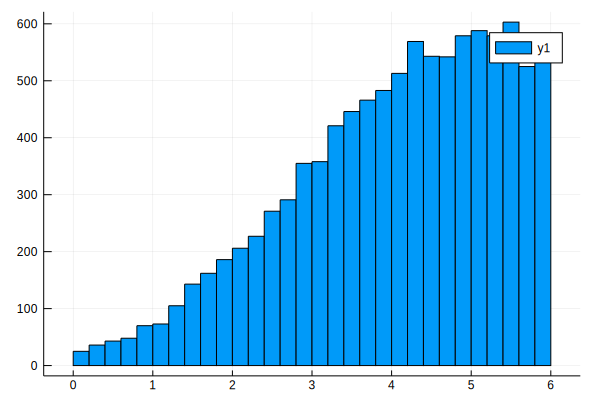

In [7]:
temp = rand(truncn, 10000);
histogram(temp, bins=40)

What are the parameter names for a distribution?

In [8]:
fieldnames(Cauchy)

(:μ, :σ)

## Examples of Other Distributions, Continuous or Discrete

#### Non-central Chi-Squared

In [9]:
chi = NoncentralChisq(5, 2)
rand(chi, 5)
params(chi)

(5.0, 2.0)

#### Negative Binomial

In [10]:
nb = NegativeBinomial(3,.2)
rand(nb,3)

3-element Array{Int64,1}:
  8
 21
  8

## Multivariate Distributions

#### Multivariate Normal

These formulas can be extended to multivariate distributions. Using the package Interact, the sampling from a multivariate distribution is shown below. I included options for the mu vector, and the variance of the x, y and covariances. 

In [11]:
vals = OrderedDict(zip([".1", "1", "10"], [0.1, 1.0, 10.0]))

mp = @manipulate for mu1 in vals, freq2 in slider(0.5:0.1:5; label="var_x"), freq3 in slider(0.5:0.1:5; label="var_y"), freq4 in slider(0.0:0.5:2; label="cov")
    mu = zeros(2).+ mu1
    sig = [freq2 freq4; freq4 freq3]
    mvn = MvNormal(mu,sig)
    mvn_samp = rand(mvn, 1000)
    scatter(mvn_samp[1,:], mvn_samp[2,:])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["mu1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>".1","val"=>1,"id"=>"idBYR4LhUf"), OrderedDict{String,Any}("key"=>"1","val"=>2,"id"=>"idfaacQfX9"), OrderedDict{String,Any}("key"=>"10","val"=>3,"id"=>"idHWISoQI6")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/austinmurphy/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/austinmurphy/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/austinmurphy/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/austinmurphy/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/austinmurphy/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x000000012f0dfcd0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"163501461980130737\",\"id\":\"ob_05\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"163501461980130737\",\"id\"

## Distribution Fitting 

The package provides a way to fit a distribution to data.

In [12]:
mvn = MvNormal(zeros(2),[2 .5; .5 2])
mvn_samp = rand(mvn, 5000)
fit_mle(MvNormal, mvn_samp)

FullNormal(
dim: 2
μ: [0.0333432, 0.00381201]
Σ: [2.03778 0.5282; 0.5282 1.99081]
)


They also provide methods for multivariate distributions such as finding the inverse of the covariance matrix:

In [13]:
invcov(mvn)

2×2 Array{Float64,2}:
  0.533333  -0.133333
 -0.133333   0.533333

Or taking the Mahalanobis distance between the center of the distribution and a vector $x$

In [14]:
sqmahal(mvn, [1, 2])

2.133333333333333

## Mixture Models

The Distribution package also provides an interface for Mixture Models. Here's an example with a mixture of gaussians. 

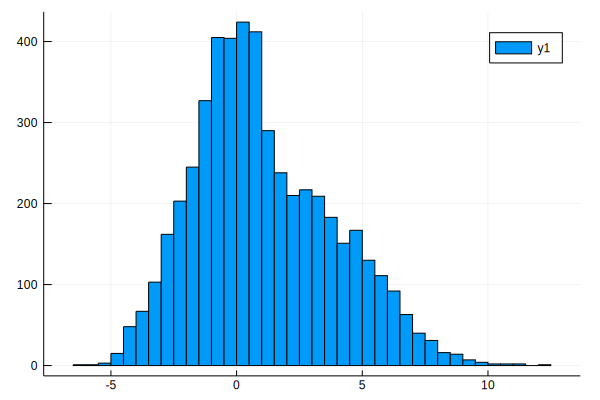

In [15]:
mm = MixtureModel(Normal[
   Normal(-2.0, 1.2),
   Normal(0.0, 1.0),
   Normal(3.0, 2.5)], [0.2, 0.3, 0.5])
mm_samp = rand(mm, 5000);
histogram(mm_samp,bins=50)

The package does not have methods for estimating mixture models, but there are other packages that do so, including GaussianMixtures.jl